In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import ensemble #ансамбли

plt.style.use('seaborn') #стиль отрисовки seaborn
%matplotlib inline

In [2]:
shoppers_data = pd.read_csv('../data/online_shoppers_intention.csv')
shoppers_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
print(shoppers_data.shape)


(12330, 18)


In [4]:
shoppers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
shoppers_data.isna().sum()


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
dummy_data = pd.get_dummies(shoppers_data)
dummy_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


c:\Users\mblyz\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


False    84.525547
True     15.474453
Name: Revenue, dtype: float64

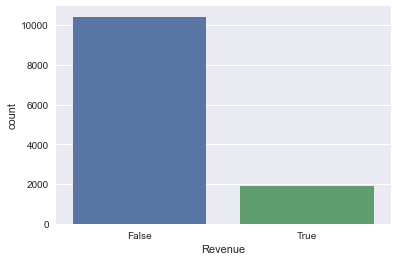

In [7]:
sns.countplot(dummy_data['Revenue'])
class_percent = dummy_data['Revenue'].value_counts(normalize=True) * 100
class_percent

In [8]:
X, y = dummy_data.drop('Revenue', axis=1), dummy_data['Revenue']


In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)
display(y_train.value_counts(normalize=True))
display(y_test.value_counts(normalize=True))

(9864, 28) (2466, 28)


False    0.845296
True     0.154704
Name: Revenue, dtype: float64

False    0.845093
True     0.154907
Name: Revenue, dtype: float64

In [10]:
rf_model = ensemble.RandomForestClassifier(
    random_state=42
)
scv = model_selection.StratifiedKFold(n_splits=5)
rf_f1_scores = model_selection.cross_validate(
    rf_model,
    X_train,
    y_train,
    scoring='f1',
    return_train_score=True,
    cv=scv
    # return_estimator=True
)
rf_f1_scores_mean = {rf_key: np.mean(rf_f1_scores[rf_key]) for rf_key in rf_f1_scores.keys()}
rf_f1_scores_mean


{'fit_time': 0.9591117858886719,
 'score_time': 0.03849649429321289,
 'test_score': 0.65003943149235,
 'train_score': 0.9999180663662433}

In [11]:
def plot_learning_curve(model, X, y, cv, scoring="f1", ax=None, title=""):
    # Вычисляем координаты для построения кривой обучения
    train_sizes, train_scores, valid_scores = model_selection.learning_curve(
        estimator=model,  # модель
        X=X,  # матрица наблюдений X
        y=y,  # вектор ответов y
        cv=cv,  # кросс-валидатор
        scoring=scoring,  # метрика
    )
    # Вычисляем среднее значение по фолдам для каждого набора данных
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    # Если координатной плоскости не было передано, создаём новую
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))  # фигура + координатная плоскость
    # Строим кривую обучения по метрикам на тренировочных фолдах
    ax.plot(train_sizes, train_scores_mean, label="Train")
    # Строим кривую обучения по метрикам на валидационных фолдах
    ax.plot(train_sizes, valid_scores_mean, label="Valid")
    # Даём название графику и подписи осям
    ax.set_title("Learning curve: {}".format(title))
    ax.set_xlabel("Train data size")
    ax.set_ylabel("Score")
    # Устанавливаем отметки по оси абсцисс
    ax.xaxis.set_ticks(train_sizes)
    # Устанавливаем диапазон оси ординат
    ax.set_ylim(0, 1)
    # Отображаем легенду
    ax.legend()

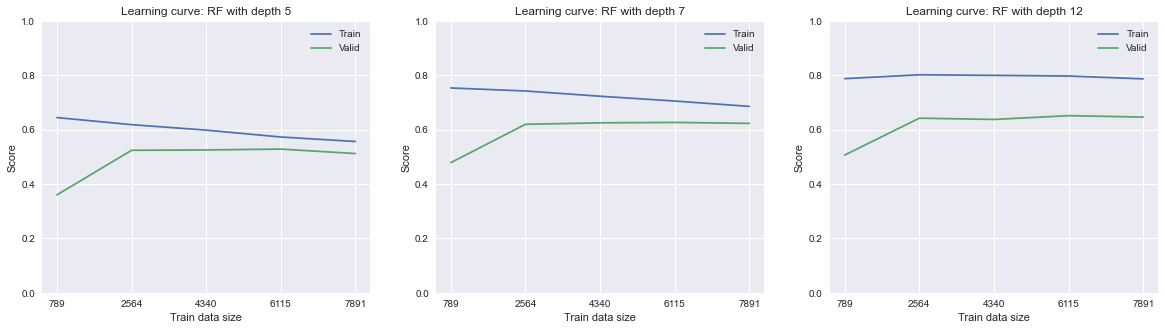

In [12]:
rf_models_list = [
    ensemble.RandomForestClassifier(max_depth=5, n_estimators=200, min_samples_leaf=5, random_state=42),
    ensemble.RandomForestClassifier(max_depth=7, n_estimators=200, min_samples_leaf=5, random_state=42),
    ensemble.RandomForestClassifier(max_depth=12, n_estimators=200, min_samples_leaf=5, random_state=42)
]
fig, axes = plt.subplots(1,3, figsize=(20,5))
for i, model in enumerate(rf_models_list):
    scv = model_selection.StratifiedKFold(n_splits=5)
    plot_learning_curve(model, X_train, y_train, scv, ax=axes[i], title=f"RF with depth {model.max_depth}")

In [24]:
# optimal depth = 7
opt_rf_model = rf_models_list[1]
opt_rf_model.fit(X_train, y_train)
y_test_preds = opt_rf_model.predict(X_test)
print(metrics.classification_report(y_test, y_test_preds))

              precision    recall  f1-score   support

       False       0.91      0.98      0.94      2084
        True       0.79      0.49      0.60       382

    accuracy                           0.90      2466
   macro avg       0.85      0.73      0.77      2466
weighted avg       0.89      0.90      0.89      2466



In [25]:
opt_rf_model_2 = rf_models_list[1]
scv = model_selection.StratifiedKFold(n_splits=5)
train_cv_proba_preds = model_selection.cross_val_predict(
    opt_rf_model_2,
    X_train,
    y_train,
    cv=scv,
    method='predict_proba'
)
precision, recall, thresholds = metrics.precision_recall_curve(y_train, train_cv_proba_preds[:,1])

best threshold: 0.36, pres: 0.66, recall: 0.72


c:\Users\mblyz\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


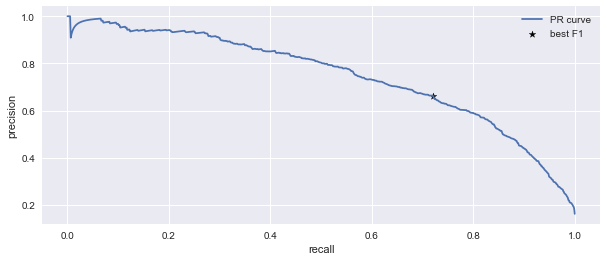

In [26]:
f1_score = 2*precision*recall/(recall + precision)
max_ind = np.argmax(f1_score)
print(f'best threshold: {thresholds[max_ind]:.2f}, pres: {precision[max_ind]:.2f}, recall: {recall[max_ind]:.2f}')
fig, axes = plt.subplots(figsize=(10,4))
sns.lineplot(recall, precision, ax=axes, label='PR curve')
axes.scatter(recall[max_ind], precision[max_ind], label='best F1', marker='*', c='Black')
axes.set_xlabel("recall")
axes.set_ylabel("precision")
axes.legend();



In [32]:
threshold_opt = 0.36
y_test_proba_preds = opt_rf_model.predict_proba(X_test)
y_pred = (y_test_proba_preds > threshold_opt)[:,1]
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.94      0.93      0.94      2084
        True       0.66      0.69      0.67       382

    accuracy                           0.90      2466
   macro avg       0.80      0.81      0.81      2466
weighted avg       0.90      0.90      0.90      2466

